In [1]:
%matplotlib widget
import numpy as np
import cmath
import matplotlib.pyplot as plt
import os
print(os.getpid())
%cd ../

import pylib.mix as mix
import pylib.measurement as mse
import est_qsvt as eqsvt
import pylib.qsvt_angles as qsvt_a

10610
/media/work/docs/codes/QuCF/scripts-py


In [2]:
for i in range(30):
    plt.close()

In [33]:
# ----------------------------------------------------------------------------------
# --- Read the parameters for the estimation of the QSVT angles ---
# ----------------------------------------------------------------------------------
mix.reload_module(eqsvt)

# initial parameters:
id_case_ = 6
N_coefs_ = 20
kappa_goal_ = int(1e4)

# read estimation parameters:
dd_ = eqsvt.read_estimation(id_case_, N_coefs_)

Reading the coefficients from:
 ./tools/QSVT-angles/inversion//QSVT-MI-estimation-coefs-case6-Nc20.hdf5
When simulated:  02/22/2024: 10:00:58
Data: for-inversion

kappa-reference: 600.000
factor-norm: 0.125
N-env-half-neg: 5650
N-env-half-pos: 5650
N-coefs-envelope-neg: 20
N-coefs-envelope-pos: 20


In [37]:
# --------------------------------------------------------
# --- Standard estimation of the QSVT angles ---
# --------------------------------------------------------
mix.reload_module(eqsvt)
print("The target condition number: {:0.3e}".format(kappa_goal_))
phis_appr_, coef_norm_ = \
    eqsvt.estimate_angles(dd_, kappa_goal_, flag_variation = False)

The target condition number: 1.000e+04
Na: 375864
Done.


In [39]:
# ------------------------------------------------------------------------------------
# --- Advanced estimation of the QSVT angles using variation of the parameters ---
# ------------------------------------------------------------------------------------
mix.reload_module(eqsvt)
print("The target condition number: {:0.3e}".format(kappa_goal_))
phis_appr_adv_, coef_norm_ = \
    eqsvt.estimate_angles(
        dd_, kappa_goal_, 
        flag_variation = True,
        # ---
        N_iter_Na = 12,
        dN_env = int(kappa_goal_ / 10.),
        # ---
        N_iter_c = 0,
        coef_dc_init = 0.2
    )

The target condition number: 1.000e+04

--- Use the variation of estimation parameters ---
N-iter: 22
dN-env: -1000

iter, Na, N-env, err:   0, 375864, 93966, 8.819e-06

------------------------------------------
--- Variation of Na ---
iter, Na, N-env, err:   1, 371864, 92966, 1.566e-04 ... reduce step
iter, Na, N-env, err:   2, 373864, 93466, 7.533e-05 ... reduce step
iter, Na, N-env, err:   3, 374864, 93716, 3.516e-05 ... reduce step
iter, Na, N-env, err:   4, 375364, 93841, 1.518e-05 ... reduce step
iter, Na, N-env, err:   5, 375612, 93903, 7.510e-06 >>> new phis
iter, Na, N-env, err:   6, 375360, 93840, 1.534e-05 ... reduce step
iter, Na, N-env, err:   7, 375484, 93871, 1.040e-05 ... reduce step
iter, Na, N-env, err:   8, 375548, 93887, 7.849e-06 ... reduce step
iter, Na, N-env, err:   9, 375580, 93895, 7.343e-06 >>> new phis
iter, Na, N-env, err:  10, 375548, 93887, 7.849e-06 ... reduce step
iter, Na, N-env, err:  11, 375564, 93891, 7.260e-06 >>> new phis
iter, Na, N-env, err:  1

1/kappa: 1.000e-04
kappa: 10000.0
Na: 375564
max-abs-err: 7.249e-06


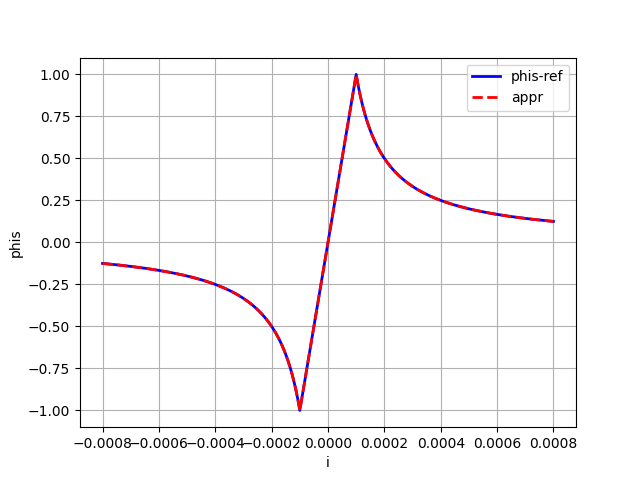

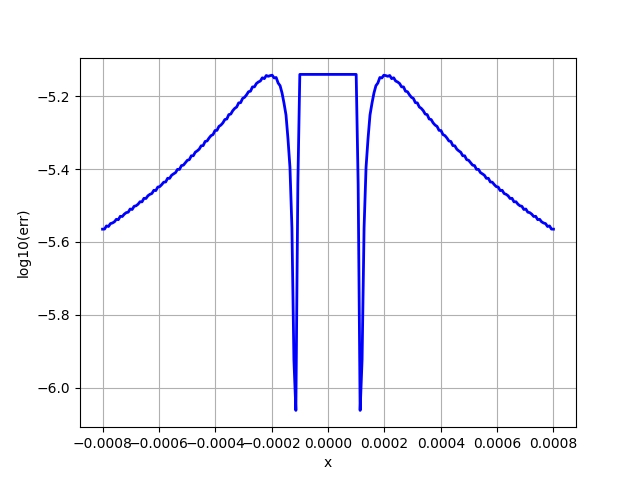

Done.


In [35]:
# ---------------------------------------------------------------------------------
# --- RECHECK: Compute the inverse function using the sequence of 2x2 rotations ---
# ---------------------------------------------------------------------------------
mix.reload_module(eqsvt)

phis_check = phis_appr_adv_

print("1/kappa: {:0.3e}".format(1./kappa_goal_))
eqsvt.construct_inverse_function_GPU(
    phis_check,
    kappa     = kappa_goal_, 
    coef_norm = coef_norm_,
    opt_domain = 2
)
print("Done.")
del phis_check

kappa: 10000.0
Na: 375864
max-abs-err: 9.360e-06


/media/work/docs/codes/QuCF/scripts-py/tools/est_qsvt.py:1087: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = plt.figure()


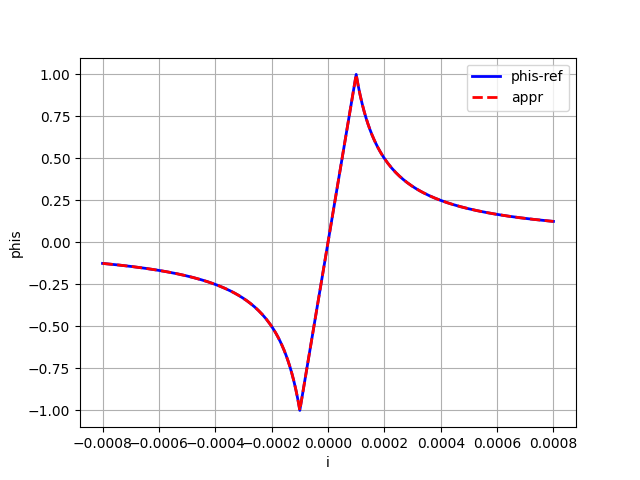

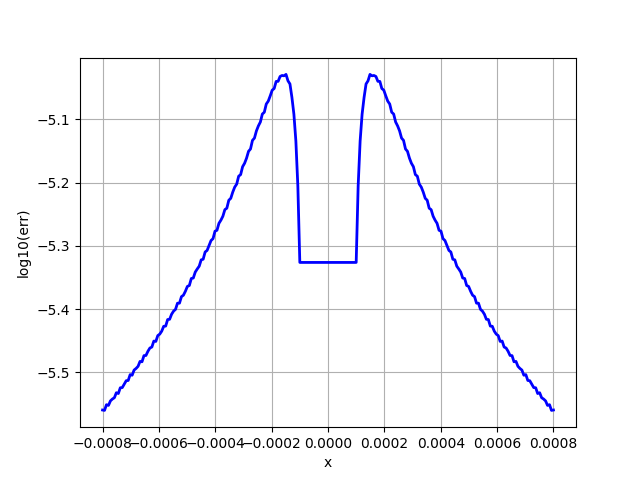

Done.


In [38]:
# ---------------------------------------------------------------------------------
# --- RECHECK: Compute the inverse function using the sequence of 2x2 rotations ---
# ---------------------------------------------------------------------------------
mix.reload_module(eqsvt)

phis_check = phis_appr_

eqsvt.construct_inverse_function_GPU(
    phis_check,
    kappa     = kappa_goal_, 
    coef_norm = coef_norm_,
    opt_domain = 2
)
print("Done.")
del phis_check

In [ ]:
# ----------------------------------------------------------------
# --- SAVE the QSVT angles to .hdf5 file ---
# ----------------------------------------------------------------
mix.reload_module(eqsvt)

# phys_save = phis_appr_
phys_save = phis_appr_adv_

eqsvt.save_estimated_angles(kappa_goal_, dd_, phys_save, id_case_, N_coefs_)

In [ ]:
# Nc  kappa     err
#   20   1e5    2.511e-04
#   40   1e5    2.511e-04
#        1e6    2.389e-03

In [ ]:
# # ------------------------------------------------------------------------------------
# # --- Advanced estimation of the QSVT angles using variation of the parameters ---
# # ------------------------------------------------------------------------------------
# mix.reload_module(eqsvt)
# print("The target condition number: {:0.3e}".format(kappa_goal_))
# phis_appr_adv_, coef_norm_ = \
#     eqsvt.estimate_angles(
#         dd_, kappa_goal_, 
#         flag_variation = True,
#         # ---
#         N_iter_Na = 12,
#         dN_env = int(kappa_goal_ / 10.),
#         # ---
#         N_coefs_cycles = 2,
#         N_coefs_to_vary = 3,
#         N_iter_c = 4,
#         coef_dc_init = 0.01
#     )